In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# declare a Base
Base = automap_base()

# load table info
Base.prepare(autoload_with=engine)

# reflect the tables (print tables mapped to Base)
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# (Display the row's columns and data in dictionary format)
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x134a00c90>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01'}

In [9]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x134a03390>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set (from Measurement table)
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

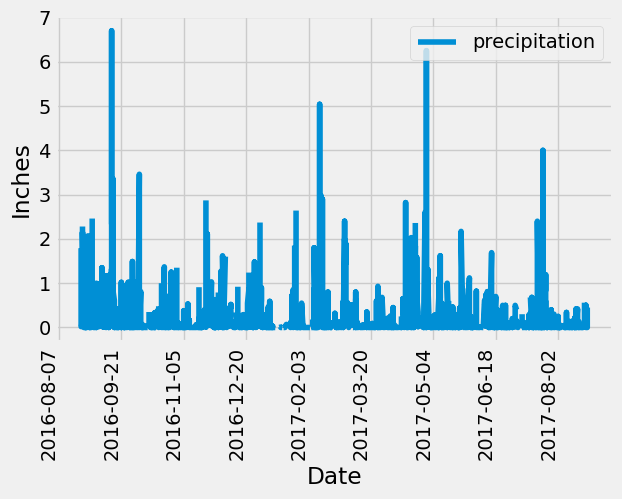

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = (dt.date(2017, 8, 23) - dt.timedelta(days=365))

# Perform a query to retrieve the data and precipitation scores
last_year_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

last_year_precip

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_year_precip, columns=['date', 'precipitation'])

# Sort the dataframe by date
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date')
df = df.set_index(['date'])

# # Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=45))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station.id).count()
stations

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station))\
                .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature (tobs).
# most active = 'USC00519281'
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(min_temp, max_temp, avg_temp)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
    filter(Measurement.date > '2016-08-23').all()

# save as dataframe
active_station_temp = pd.DataFrame(results, columns = ['temperature'])

# plot dataframe as histogram
active_station_hist = active_station_temp.hist(bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("Temperature Data for Past 12 Months")
plt.show()

TypeError: DataFrame.__init__() got an unexpected keyword argument 'legend'

# Close Session

In [ ]:
# Close Session
session.close()